# Acceptance map that "ruins" GENIE samples to mimic the detector

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/acceptance/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
overlay_scalings = dict()
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}
applied cuts to overlay
applied cuts to data


In [6]:
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]

In [7]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


In [8]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


In [9]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'

926088  GENIE interaction
243732 GENIE CC1p0π events


# Randomly sample 350 CC1p0$\pi$ events from the overlay, and compare to GENIE samples - what do we get?

(array([  83.,  101.,   85.,   34.,   23.,   12.,    7.,    1.,    4.,    0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

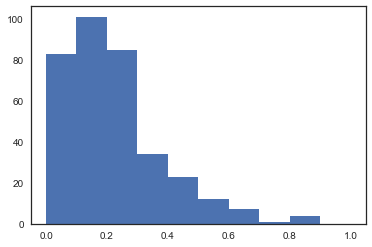

In [15]:
Nrand = 350
random_CC1p0pi_events = selected_CC1p0pi_tightFV.sample(n=Nrand)
plt.hist(random_CC1p0pi_events['reco_Q2'],bins=linspace(0,1,11))
